In [1]:
%pylab inline
import uproot
import awkward as ak
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_no_selections = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/output/HHggTauTau_InclusivePresel_genZStudy_20210407_all_resonant_backgrounds_with_gen_info_no_had_tau_cut.pkl")

In [3]:
df = df_no_selections.loc[df_no_selections["n_tau"] >= 1]

<AxesSubplot:>

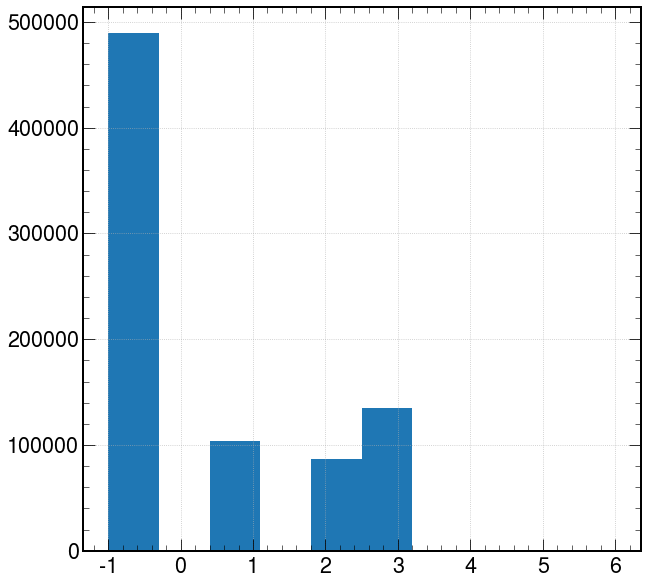

In [6]:
df["Category_pairsLoose"].hist()

In [7]:
import json
with open("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/output/HHggTauTau_InclusivePresel_genZStudy_20210407_all_resonant_backgrounds_with_gen_info_no_had_tau_cut.json") as f:
    input_options = json.load(f)

In [8]:
eTauEvents = df.loc[df["Category_pairsLoose"] == 2]
muTauEvents = df.loc[df["Category_pairsLoose"] == 1]
tauTauEvents = df.loc[df["Category_pairsLoose"] == 3]
tauZeroLepEvents = df.loc[df["Category_pairsLoose"] == -1]

### First, check composition of Z $\rightarrow \ell\ell$ events after the hadronic criteria has been applied

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


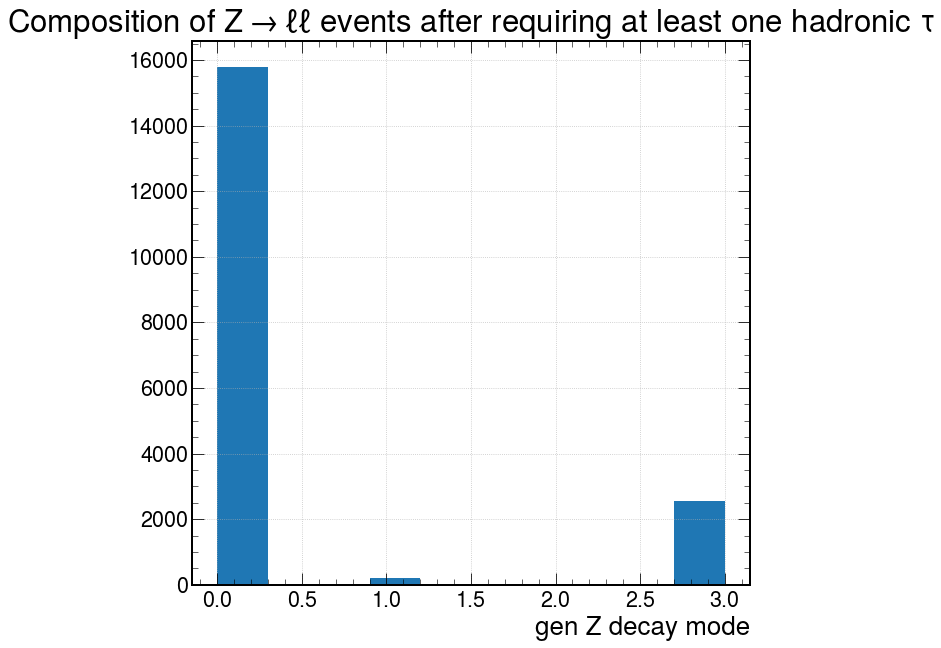

In [9]:
plt.figure()
df.loc[df["process_id"] == 9, "genZ_decayMode"].hist()
plt.title(r"Composition of Z$\rightarrow \ell\ell$ events after requiring at least one hadronic $\tau$")
plt.xlabel("gen Z decay mode")
plt.savefig("Z_ll_after_category_requirement.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


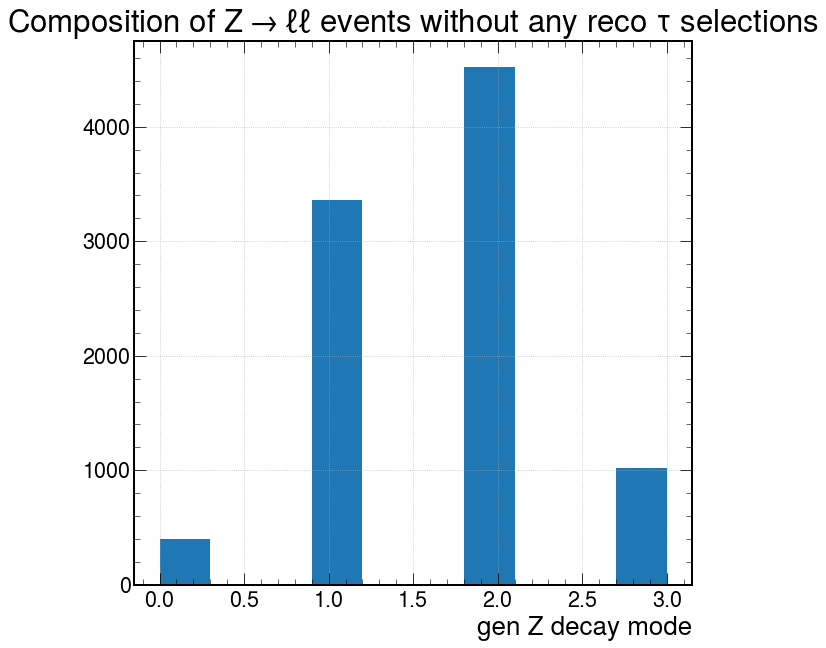

In [10]:
df_no_selections.loc[(df_no_selections["process_id"] == 9) & (df_no_selections["m_tautauSVFitLoose"] > 0), "genZ_decayMode"].hist()
plt.title(r"Composition of Z$\rightarrow \ell\ell$ events without any reco $\tau$ selections")
plt.xlabel("gen Z decay mode")
plt.savefig("Z_ll_no_category_requirement.pdf")

### Where do Z$\rightarrow \mu\mu$ events end up getting categorized

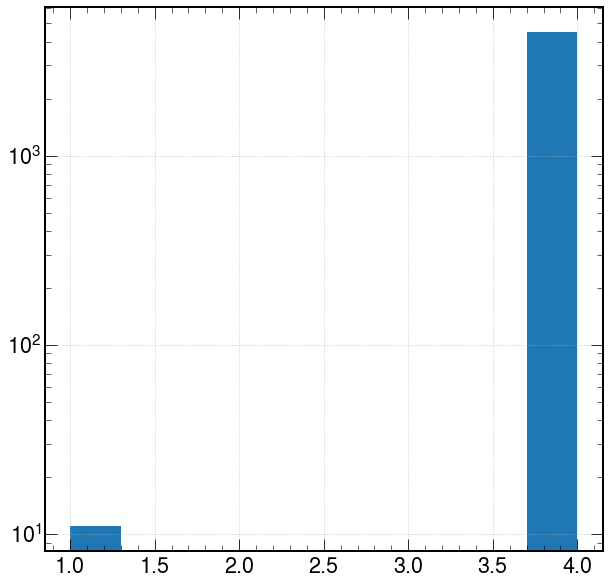

In [11]:
df_no_selections.loc[(df_no_selections["process_id"] == 9) & (df_no_selections["m_tautauSVFitLoose"] > 0) & (df_no_selections["genZ_decayMode"] == 2),"Category_pairsLoose"].hist()
plt.yscale("log")

Whilst a small amount gets classified as $\mu$ + h, most of them get classified as $\tau\tau \rightarrow \mu\mu$

### SVFit mass plots split by category!

Overall plot, i.e., categories 1, 2, 3

Making plots for branch  m_tautauSVFitLoose


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


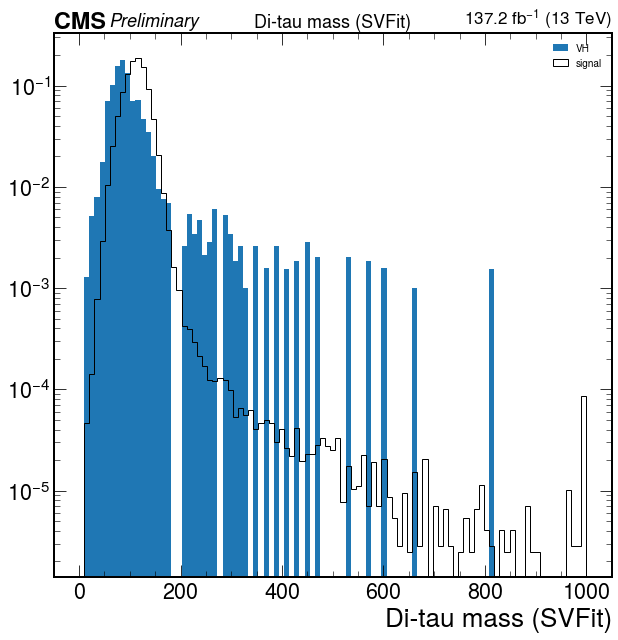

In [9]:
svfit_plotter = plotter.Plotter(df = df, input_options = input_options, plot_options = "/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/BDT_distributions/prelim_plots/bdt_distributions.json", branches = ["m_tautauSVFitLoose"], save_filenames = "SVFit_cats_123.pdf")
svfit_plotter.run()

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


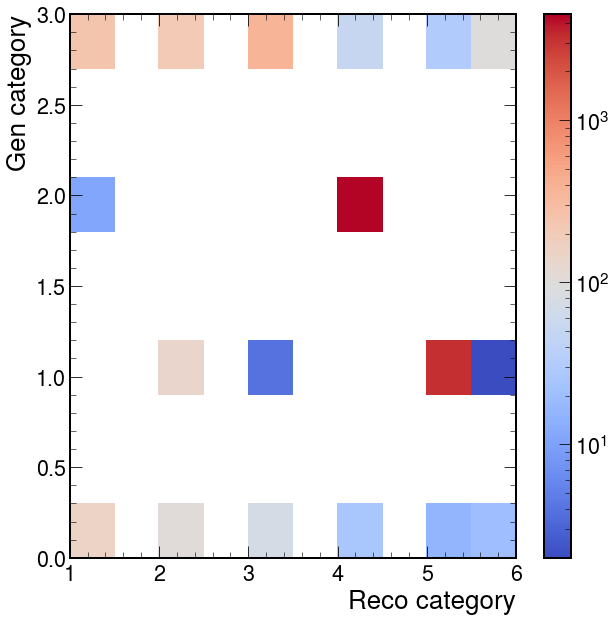

In [66]:
temp = df_no_selections.loc[(df_no_selections["process_id"] == 9) & (df_no_selections["m_tautauSVFitLoose"] > 0) , ["Category_pairsLoose","genZ_decayMode"]]
plt.hist2d(x = temp["Category_pairsLoose"], y = temp["genZ_decayMode"], norm=mpl.colors.LogNorm(), cmap = "coolwarm")
plt.xlabel("Reco category")
plt.ylabel("Gen category")
plt.colorbar()
plt.savefig("reco_v_gen_Z_ll.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


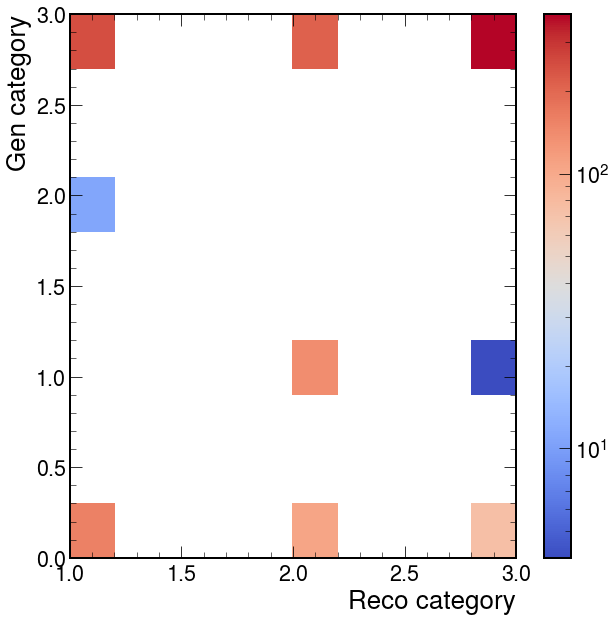

In [65]:
temp = df.loc[(df["process_id"] == 9) & (df["m_tautauSVFitLoose"] > 0) , ["Category_pairsLoose","genZ_decayMode"]]
plt.hist2d(x = temp["Category_pairsLoose"], y = temp["genZ_decayMode"], norm=mpl.colors.LogNorm(), cmap = "coolwarm")
plt.xlabel("Reco category")
plt.ylabel("Gen category")
plt.colorbar()
plt.savefig("reco_v_gen_Z_ll_after_category_filter.pdf")

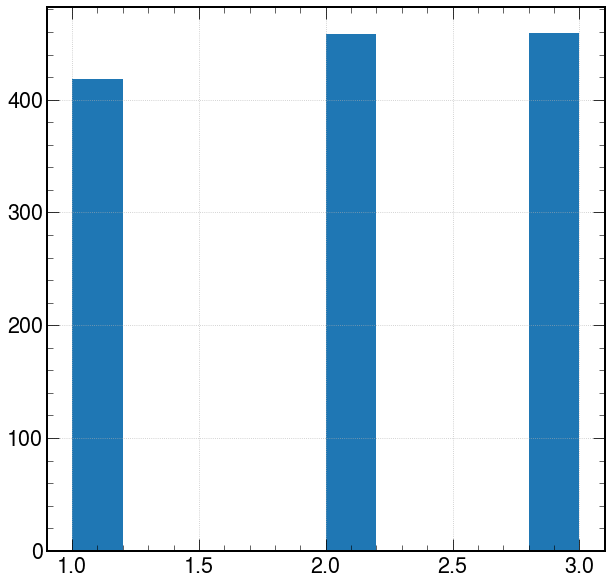

In [70]:
counts = df.loc[(df["process_id"] == 9) , "Category_pairsLoose"].hist()

In [72]:
np.histogram(df.loc[(df["process_id"] == 9) , "Category_pairsLoose"])

(array([418,   0,   0,   0,   0, 458,   0,   0,   0, 459]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]))

Making plots for branch  m_tautauSVFitLoose


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


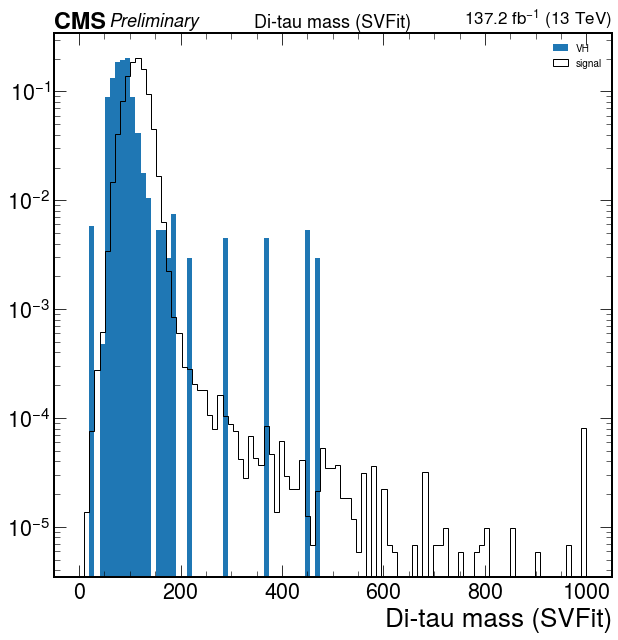

In [11]:
svfit_plotter = plotter.Plotter(df = df.loc[df["Category_pairsLoose"] == 3], input_options = input_options, plot_options = "/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/BDT_distributions/prelim_plots/bdt_distributions.json", branches = ["m_tautauSVFitLoose"], save_filenames = "SVFit_cats_3.pdf")
svfit_plotter.run()

Making plots for branch  m_tautauSVFitLoose


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


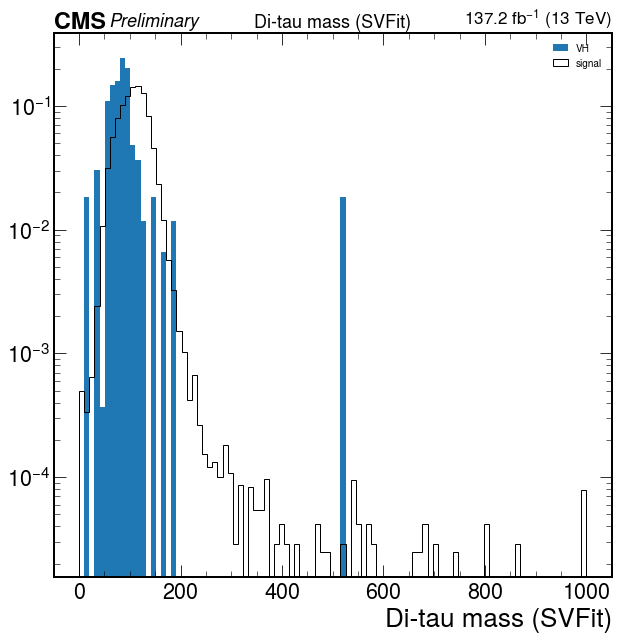

In [12]:
svfit_plotter = plotter.Plotter(df = df_no_selections.loc[df_no_selections["Category_pairsLoose"] == 6], input_options = input_options, plot_options = "/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/BDT_distributions/prelim_plots/bdt_distributions.json", branches = ["m_tautauSVFitLoose"], save_filenames = "SVFit_cats_no_sel_6.pdf")
svfit_plotter.run()

Making plots for branch  gg_mass
VBFH 0.01534642232581973
ggH 0.06075213011354208
VH 0.610564602597151
ttH 0.987358001555549


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


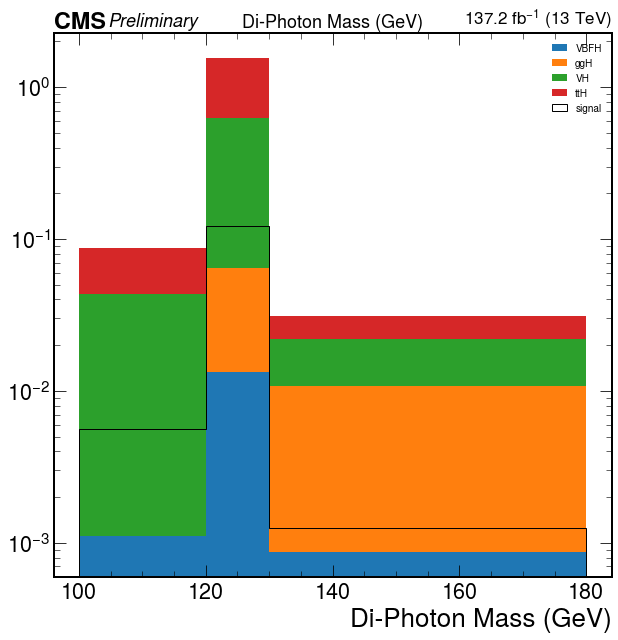

In [73]:
table_plotter = plotter.Plotter(df = df, input_options = input_options, plot_options = "../resonant_background_estimates/table_options_test.json", branches = "all")
table_plotter.run()
table_plotter.make_tables()

Making plots for branch  n_electrons


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  n_muons


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  n_tau


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


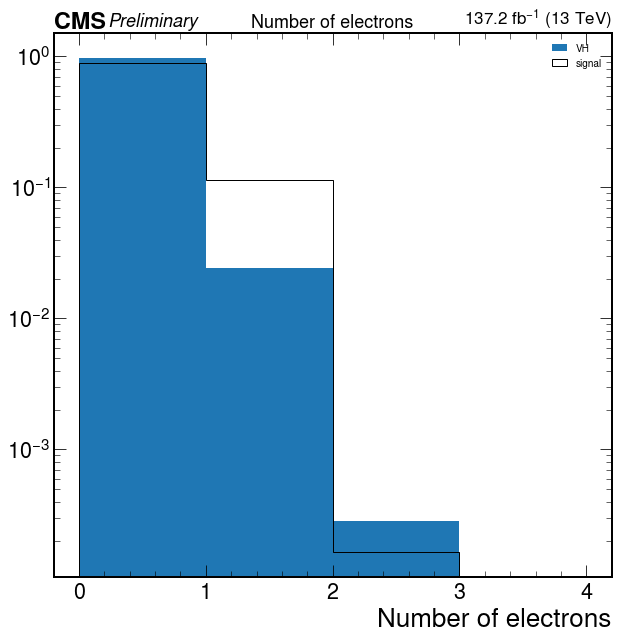

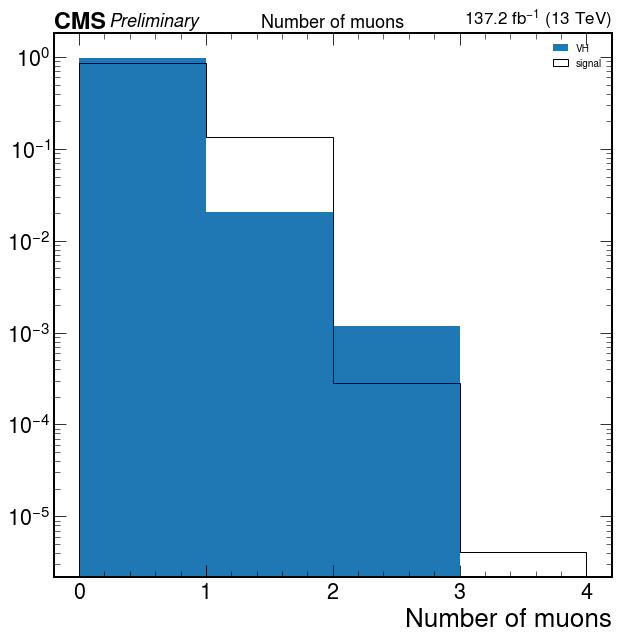

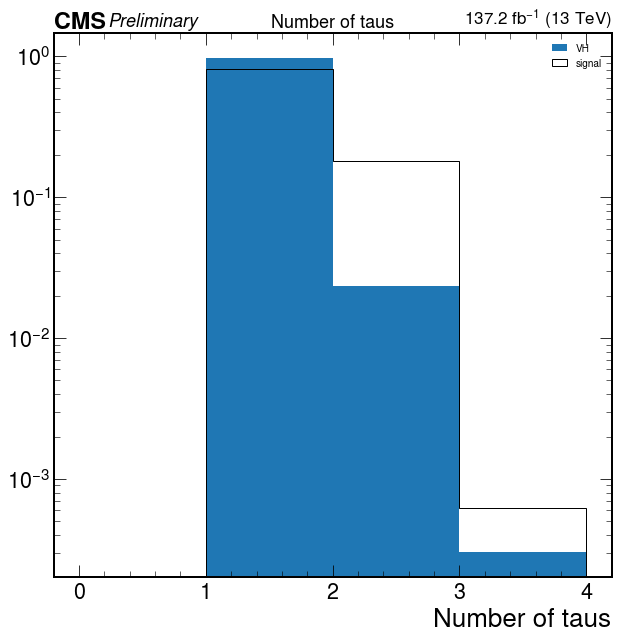

In [15]:
temp = plotter.Plotter(df = df, input_options = input_options, plot_options = "/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/BDT_distributions/prelim_plots/bdt_distributions.json", branches = ["n_electrons", "n_muons", "n_tau"])
temp.run()

Making plots for branch  gg_mass
ttH 4.41605383346905
VBFH 5.28567263239529
VH 8.961976657970808
ggH 22.40524939727038


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


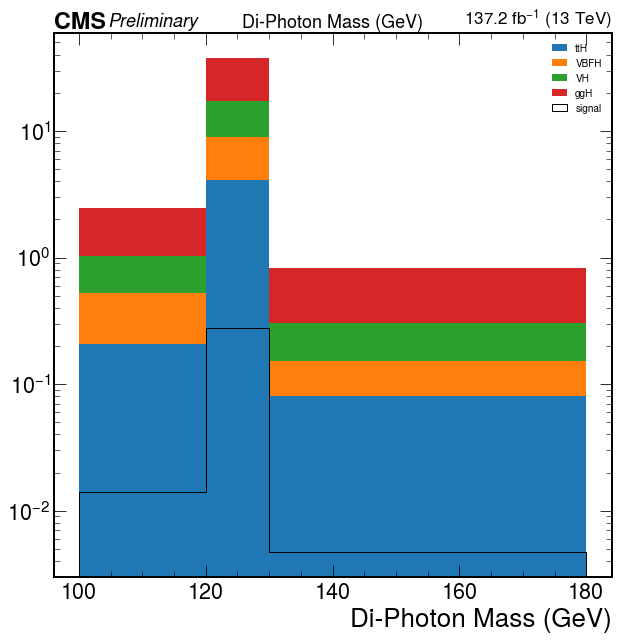

In [12]:
table_plotter = plotter.Plotter(df = df, input_options = input_options, plot_options = "../resonant_background_estimates/table_options_test.json", branches = "all")
table_plotter.run()
table_plotter.make_tables()

Making plots for branch  gg_mass
VBFH 0.01534642232581973
ggH 0.06075213011354208
VH 0.6235755723319016
ttH 1.024417544278549


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


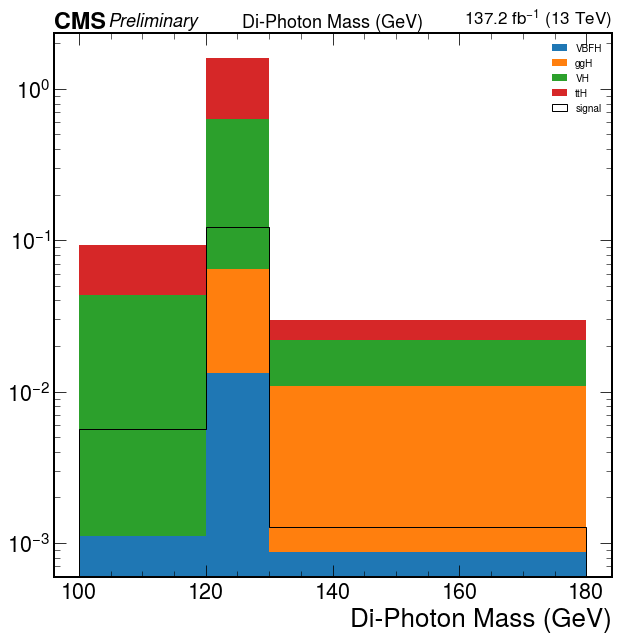

In [13]:
table_plotter = plotter.Plotter(df = df.loc[df["Category_pairsLoose"] >= 0], input_options = input_options, plot_options = "../resonant_background_estimates/table_options_test.json", branches = "all")
table_plotter.run()

<AxesSubplot:>

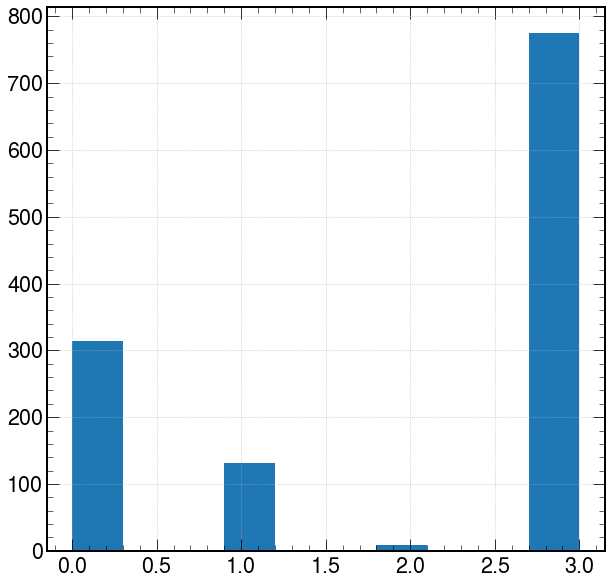

In [15]:
df.loc[(df["gg_mass"] > 120) & (df["gg_mass"] < 130) & (df["process_id"] == 9), "genZ_decayMode"].hist()

<AxesSubplot:>

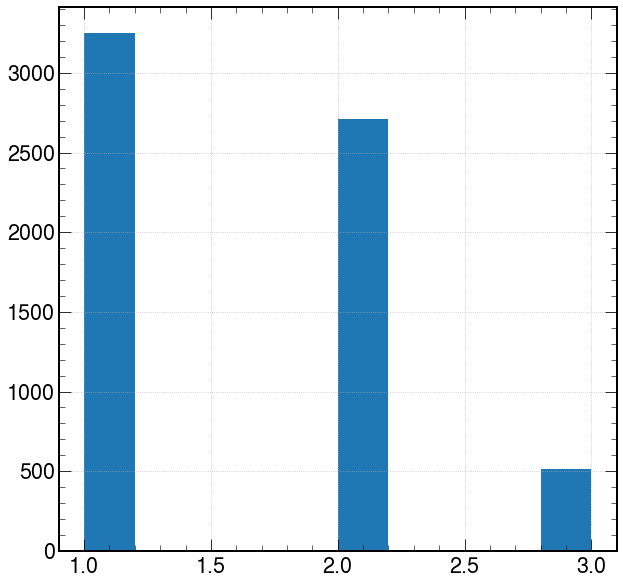

In [58]:
df.loc[(df["process_id"] == -4) & (df["gg_mass"] > 120) & (df["gg_mass"] < 130) , "Category_pairsLoose"].hist()

In [74]:
plot_json = json.load(open("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/BDT_distributions/prelim_plots/bdt_distributions.json"))

In [75]:
plot_json["jet1_bTagDeepFlavB"] = {"bin_type":"linspace",
                                   "bins" : [0,1,50], 
                                   "processes":["ttH","VH","signal"], 
                                   "normalize":"unit_area",
                                   "yaxis":"log",
                                   "title":"B-tag score for jet 1",
                                   "cms_label":1,
                                   "output_name":"jet1_bTagDeepFlavB.pdf"}

Making plots for branch  jet1_bTagDeepFlavB


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


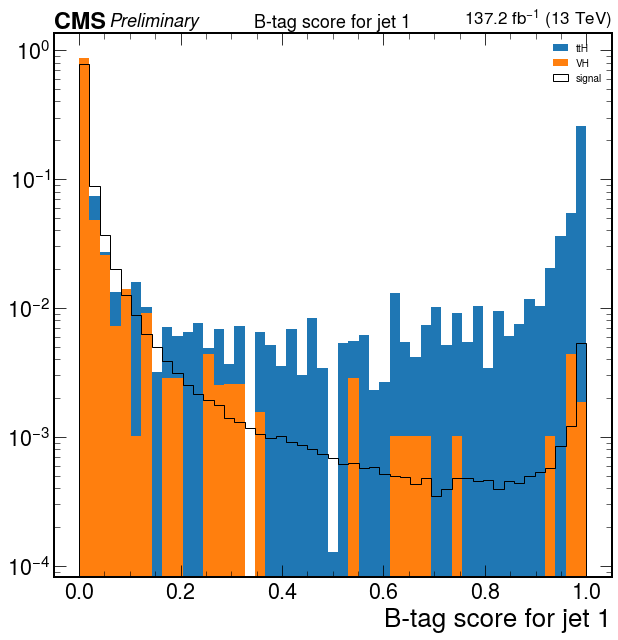

In [76]:
btag_plotter = plotter.Plotter(df = df, input_options = input_options, plot_options = plot_json, branches = ["jet1_bTagDeepFlavB"] )
btag_plotter.run()

In [77]:
plot_json["jet2_bTagDeepFlavB"] = {"bin_type":"linspace",
                                   "bins" : [0,1,50], 
                                   "processes":["ttH","VH","signal"], 
                                   "normalize":"unit_area",
                                   "yaxis":"log",
                                   "title":"B-tag score for jet 2",
                                   "cms_label":1,
                                   "output_name":"jet2_bTagDeepFlavB.pdf"}

Making plots for branch  jet2_bTagDeepFlavB


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


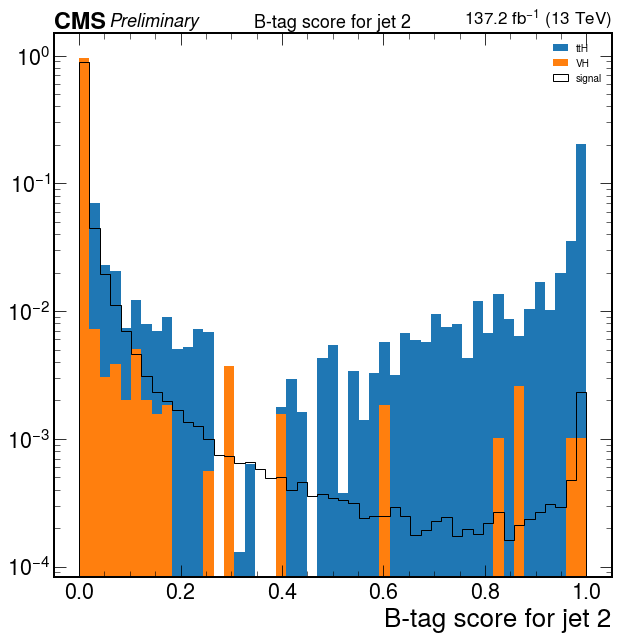

In [78]:
btag_plotter = plotter.Plotter(df = df, input_options = input_options, plot_options = plot_json, branches = ["jet2_bTagDeepFlavB"] )
btag_plotter.run()

4         -1
7         -1
9         -1
14        -1
16        -1
          ..
1390949   -1
1390950   -1
1390951   -1
1390952   -1
1390953   -1
Name: Category_pairsLoose, Length: 489110, dtype: int32

Making plots for branch  gg_mass
ttH 3.381247790734051
VBFH 5.27032621006947
VH 8.337784300500061
ggH 22.34449726715684


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


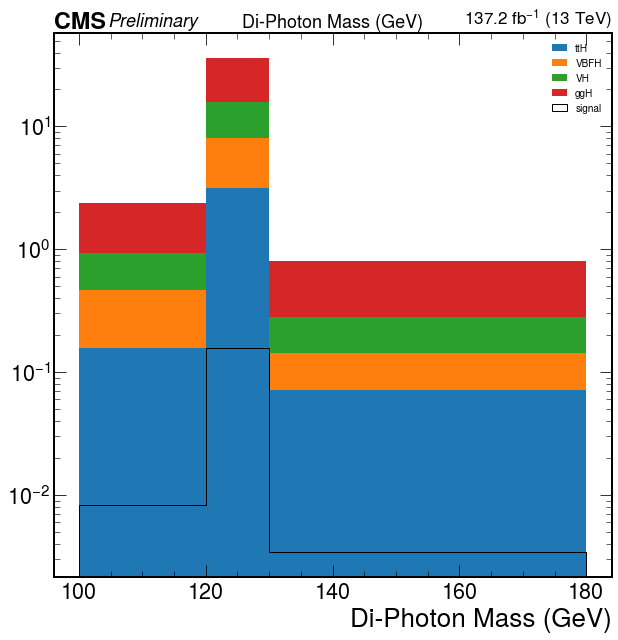

In [20]:
table_plotter = plotter.Plotter(df = df.loc[(df["n_electrons"] + df["n_muons"] + df["n_tau"]) == 1], input_options = input_options, plot_options = "../resonant_background_estimates/table_options_test.json", branches = "all")
table_plotter.run()
table_plotter.make_tables()

In [22]:
df["m_tautauSVFitLoose"]

0          106.013588
3          108.224869
4           -1.000000
7           -1.000000
8          118.858765
              ...    
1390949     -1.000000
1390950     -1.000000
1390951     -1.000000
1390952     -1.000000
1390953     -1.000000
Name: m_tautauSVFitLoose, Length: 815838, dtype: float32